In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random


# Import API key
import api_keys
# Google API Key
#from config import gkey
#from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
lati = []
lngi = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        lati.append(lat_lng[0])
        lngi.append(lat_lng[1])

# Print the city count to confirm sufficient count
#len(cities)
cities_df = pd.DataFrame({"City": [cities]})
cities_df = pd.DataFrame(cities)
#cities_df["Lat"] = ""
#cities_df["Lng"] = ""
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df["latitude"] = lati
cities_df["longitude"] = lngi
cities_df.head()



#city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

,0,City,Country,latitude,longitude
0,mahebourg,mahebourg,mu,-42.078979,73.034267
1,jamestown,jamestown,sh,-30.665895,-3.062636
2,ostrovnoy,ostrovnoy,ru,79.100825,43.027434
3,saint-philippe,saint-philippe,re,-43.326214,66.686624
4,nizhneyansk,nizhneyansk,ru,82.408026,138.208348


## Perform API Calls

In [3]:
import datetime
current_time = datetime.datetime.now()




# OpenWeatherMap API Key
#import api_keys
#api_key = api_keys.api_key
#cities = ["Paris", "London", "Oslo", "Beijing"]
api_key = "21a8e81ea8e85672bb0430b88dbf3573"
#city = "newport"
#country_code = "us"

#lat = []
#temp = []

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL and request your results in Celsius
#query_url = f"{url}appid={api_key}&q={city}&units={units}"
#query_url = f"{url}appid={api_key}&q={city},{country_code}"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = f"{url}appid={api_key}&units={units}&q="

#temp = []

    # city
#point = row['City']
    
#country_code = row['Country']
units = "fahrenheit"
lat = []
temp = []
humidity = []
wind = []
clouds = []
city_number = []
city_name = []


# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    point = row['City']
    print(("randomly generated city: ") + (point))
    
    country_code = row['Country']
#for city in cities:
#    try:
#    query_url = f"{url}appid={api_key}&units={units}&q="
#    query_url = f"{url}appid={api_key}&q={point}&units={units}"
    query_url = f"{url}appid={api_key}&q={point},{country_code}&units={units}"
#    print(f"City: {city_name}")



# Loop through the list of cities and perform a request for data on each
#for city in cities:
    response = requests.get(query_url + city).json()
 #   lat.append(response['coord']['lat'])
    try:
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        city_number.append(response['id'])
        city_name.append(response['name'])
        print("city identification number:")
        print(response['id'])
        print('')
        

#        print(response)
#    temp = response["main"]["temp"]
#    lat.append(response['coord']['lat'])
#    temp.append(response['main']['temp'])
#        id.append(response['id'])
    

#    temp.append(response_json['temp'])
    
#temp = weather_json["main"]["temp"]
#temp.append(response['main']['temp'])

#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
#print(f"The latitude information received is: {lat}")
################print(f"The temperature information received is: {temp}")

#print(response)
 #   print(f"The latitude information received is: {lat}")
#        print(f"The temperature information received is: {temp}")

    
    except (KeyError, IndexError):
        print("No weather data available for this city. \n")



randomly generated city: mahebourg
city identification number:
934322

randomly generated city: jamestown
city identification number:
3370903

randomly generated city: ostrovnoy
city identification number:
556268

randomly generated city: saint-philippe
city identification number:
935215

randomly generated city: nizhneyansk
No weather data available for this city. 

randomly generated city: new norfolk
city identification number:
2155415

randomly generated city: aleksandrovsk-sakhalinskiy
city identification number:
2127282

randomly generated city: sembakung
city identification number:
1627877

randomly generated city: barentsburg
No weather data available for this city. 

randomly generated city: tuatapere
city identification number:
2180815

randomly generated city: lebu
city identification number:
3883457

randomly generated city: bulgan
city identification number:
2032201

randomly generated city: iqaluit
city identification number:
5983720

randomly generated city: mataura
No w

city identification number:
371745

randomly generated city: tuktoyaktuk
city identification number:
6170031

randomly generated city: nampula
city identification number:
1033356

randomly generated city: ribeira grande
city identification number:
3372707

randomly generated city: port blair
city identification number:
1259385

randomly generated city: avarua
city identification number:
4035715

randomly generated city: guerrero negro
city identification number:
4021858

randomly generated city: carballo
city identification number:
3126369

randomly generated city: montelibano
city identification number:
3674470

randomly generated city: adrar
city identification number:
2508813

randomly generated city: hoogeveen
city identification number:
2753719

randomly generated city: khatanga
city identification number:
2022572

randomly generated city: narsaq
city identification number:
3421719

randomly generated city: hofn
city identification number:
2630299

randomly generated city: puerto 

city identification number:
1726449

randomly generated city: pouebo
city identification number:
2138607

randomly generated city: rach gia
city identification number:
1568510

randomly generated city: panama city
city identification number:
4167694

randomly generated city: tiksi
city identification number:
2015306

randomly generated city: vila do maio
city identification number:
3374120

randomly generated city: aloleng
city identification number:
1731298

randomly generated city: nemuro
city identification number:
2128975

randomly generated city: talnakh
city identification number:
1490256

randomly generated city: safford
city identification number:
5312476

randomly generated city: freeport
city identification number:
4893171

randomly generated city: severo-kurilsk
city identification number:
2121385

randomly generated city: rawson
city identification number:
3839307

randomly generated city: port lincoln
city identification number:
2063036

randomly generated city: kununurra


No weather data available for this city. 

randomly generated city: cheyenne
city identification number:
5821086

randomly generated city: bonavista
city identification number:
5905393

randomly generated city: hwange
city identification number:
889942

randomly generated city: sochaczew
city identification number:
758682

randomly generated city: nuuk
city identification number:
3421319

randomly generated city: manzanillo
city identification number:
3996663

randomly generated city: san mateo ixtatan
city identification number:
3589770

randomly generated city: orlik
city identification number:
1496073

randomly generated city: marsa matruh
city identification number:
352733

randomly generated city: lazaro cardenas
city identification number:
3996234

randomly generated city: kontagora
city identification number:
2334008

randomly generated city: cabedelo
city identification number:
3404558

randomly generated city: turka
city identification number:
2014808

randomly generated city:

city identification number:
3357804

randomly generated city: malyn
city identification number:
702116

randomly generated city: neman
city identification number:
522742

randomly generated city: sucua
city identification number:
3650956

randomly generated city: fukue
city identification number:
1848373

randomly generated city: touros
city identification number:
3386213

randomly generated city: kegayli
No weather data available for this city. 

randomly generated city: zaysan
city identification number:
1517060

randomly generated city: tromso
city identification number:
3133895

randomly generated city: havoysund
city identification number:
779622

randomly generated city: reyes
city identification number:
3906478

randomly generated city: hervey bay
city identification number:
2146219

randomly generated city: sistranda
city identification number:
3139597

randomly generated city: marica
city identification number:
3457708

randomly generated city: betioky
No weather data availabl

city identification number:
3355624

randomly generated city: hay river
city identification number:
5972762

randomly generated city: nishihara
city identification number:
1850144

randomly generated city: lompoc
city identification number:
5367788

randomly generated city: belushya guba
No weather data available for this city. 

randomly generated city: sidney
city identification number:
5172078

randomly generated city: broome
city identification number:
2075720

randomly generated city: la ronge
city identification number:
6050066

randomly generated city: boa vista
city identification number:
3664980

randomly generated city: charters towers
city identification number:
2171722

randomly generated city: kirakira
city identification number:
2178753

randomly generated city: ballina
city identification number:
2177069

randomly generated city: ilhabela
city identification number:
3461425

randomly generated city: kaohsiung
city identification number:
1673820

randomly generated city: 

In [4]:
generated_time = str(current_time)
generated_time

'2018-09-27 00:17:55.615815'

In [6]:





# create a data frame from cities, lat, and temp
weather_dict = {
    "City Name": city_name,
    "City Number": city_number,
    "Latitude": lat,
    "Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloud Cover": clouds,
    
}
weather_data = pd.DataFrame(weather_dict)
ctemp = weather_data["Temperature"] - 273.15
ftemp = ctemp * 1.8 + 32
weather_data['Temp in Fahrenheit'] = ftemp.apply(np.round)


weather_data.to_csv("Weather Data.csv")
weather_data.head()

,City Name,City Number,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover,Temp in Fahrenheit
0,Mahebourg,934322,-20.41,297.150,64,5.70,40,75.0
1,Jamestown,3370903,-15.94,291.791,100,7.52,76,66.0
2,Ostrovnoy,556268,68.05,277.691,100,3.47,92,40.0
3,Saint-Philippe,935215,-21.36,298.150,44,1.50,0,77.0
4,New Norfolk,2155415,-42.78,293.150,32,8.70,0,68.0


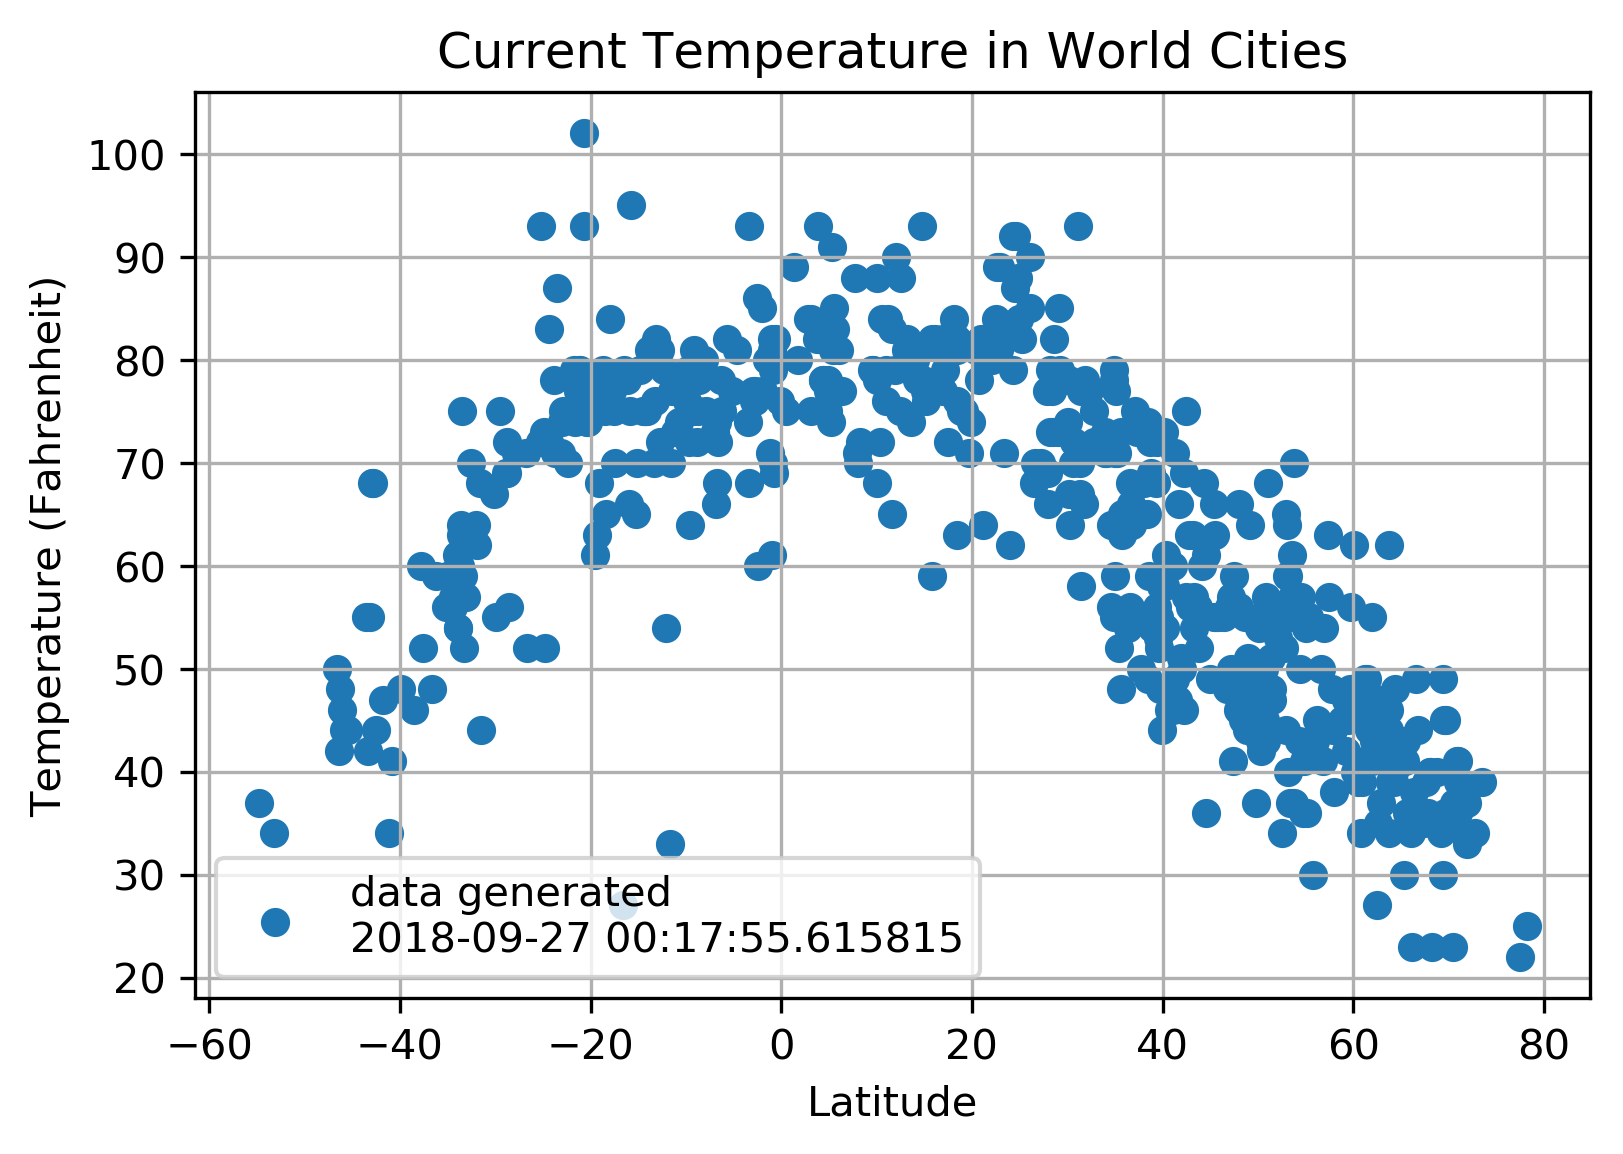

In [7]:
# Build a scatter plot for each data type
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(weather_data["Latitude"], weather_data["Temp in Fahrenheit"], label=("data generated\n" + generated_time), marker="o",) 

# Incorporate the other graph properties
plt.title("Current Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(loc="best")


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.savefig("temptest.png")
plt.show()

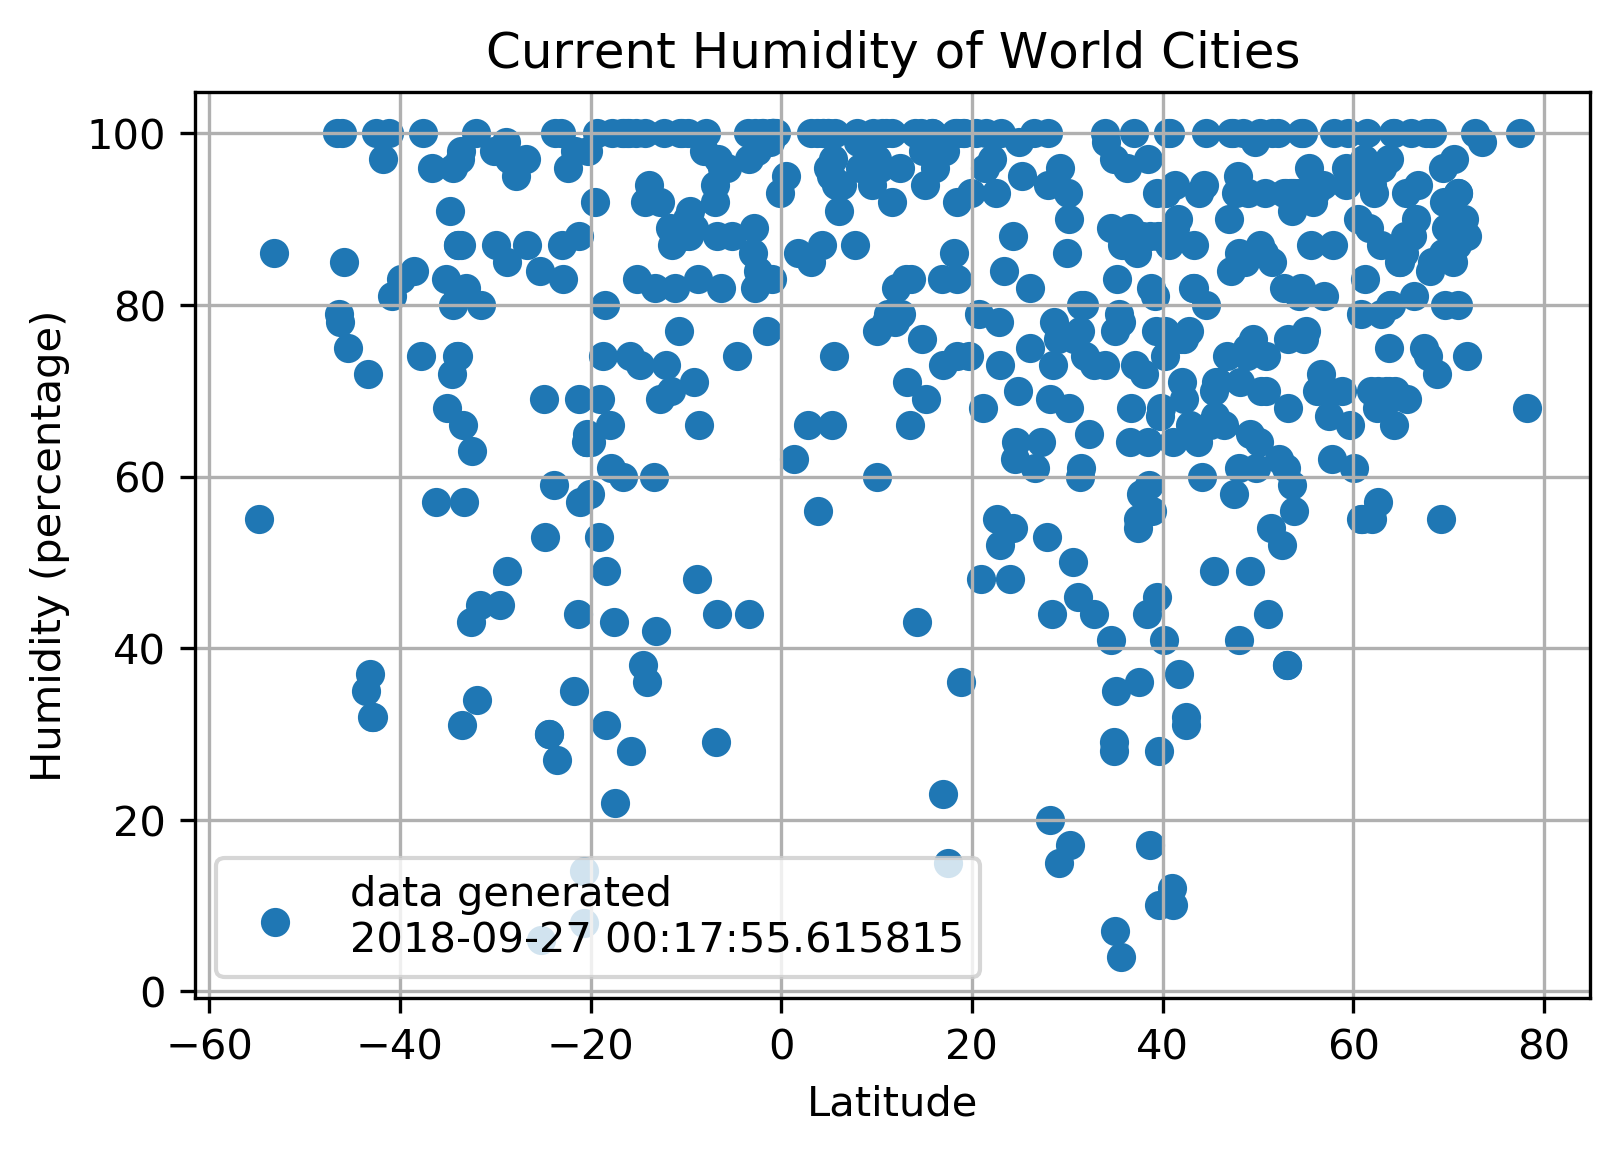

In [8]:
# Build a scatter plot for each data type
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], label=("data generated\n" + generated_time), marker="o",) 

# Incorporate the other graph properties
plt.title("Current Humidity of World Cities")
plt.ylabel("Humidity (percentage)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(loc="best")


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.savefig("humidtest.png")
plt.show()

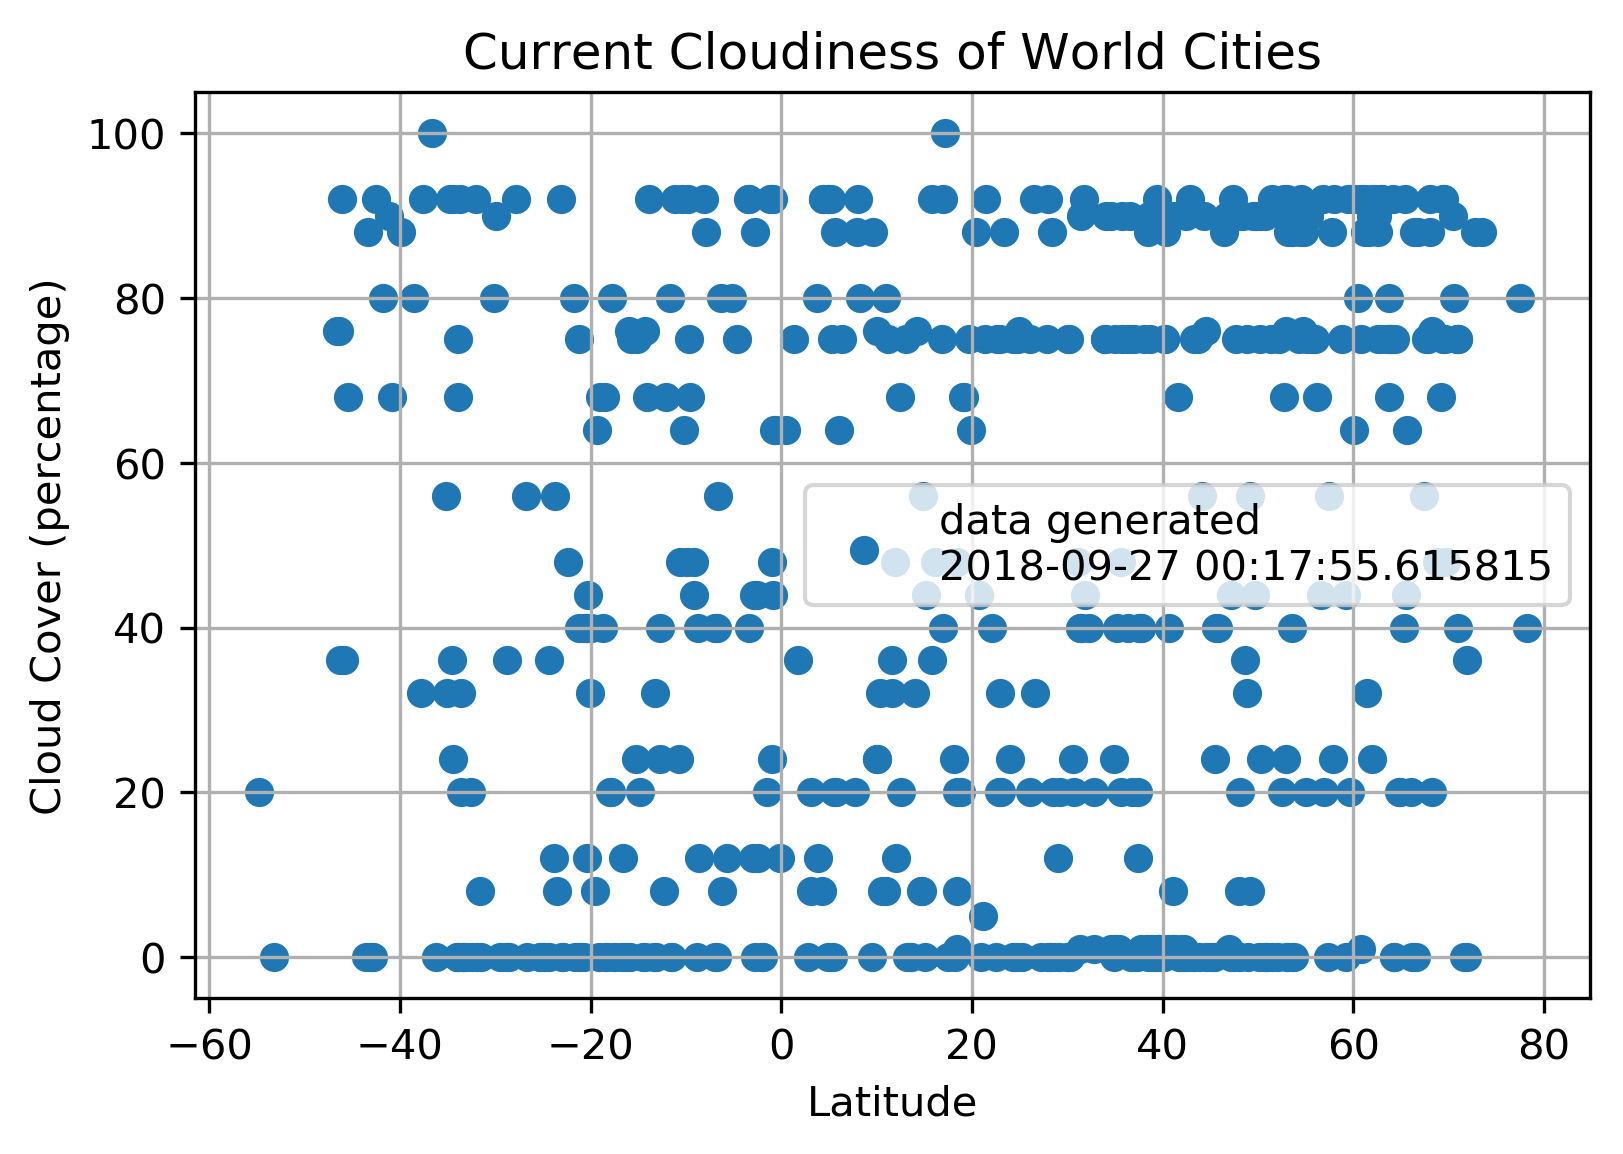

In [9]:
# Build a scatter plot for each data type
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(weather_data["Latitude"], weather_data["Cloud Cover"], label=("data generated\n" + generated_time), marker="o",) 

# Incorporate the other graph properties
plt.title("Current Cloudiness of World Cities")
plt.ylabel("Cloud Cover (percentage)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(loc="best")


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.savefig("cloudtest.png")
plt.show()

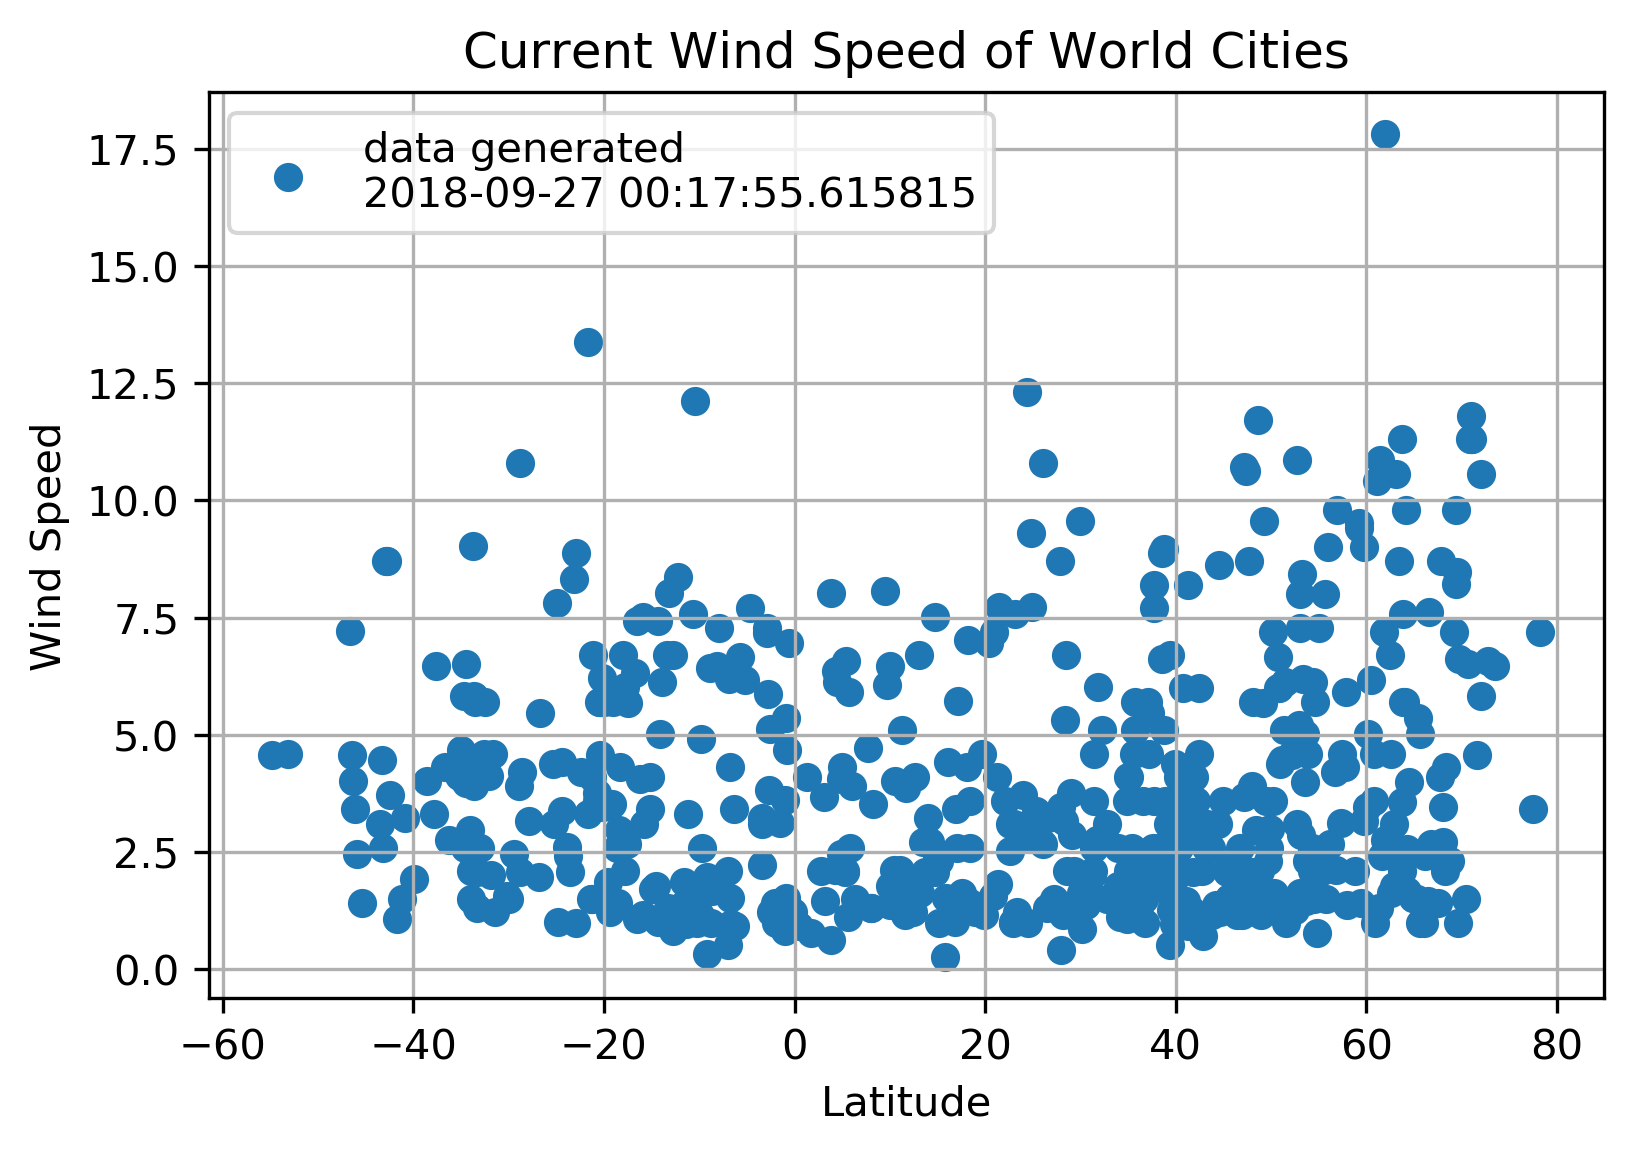

In [10]:
# Build a scatter plot for each data type
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], label=("data generated\n" + generated_time), marker="o",) 

# Incorporate the other graph properties
plt.title("Current Wind Speed of World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend(loc="best")


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.savefig("windtest.png")
plt.show()